# HW8 due 11:30a Mon Dec 5

# Asteroids control system

This problem deals with the asteroids control system (N)
$$\dot{x} = f(x,u),\ y = h(x,u)$$
with equilibrium
$$ f(x_0,u_0) = 0$$
and associated linear control system (L)
$$\dot{\xi} = A\xi + B\mu,\ \eta = C\xi + D\mu$$
obtained with $A = D_x f(x_0,u_0)$, $B = D_u f(x_0,u_0)$, $C = D_x h(x_0,u_0)$, $D = D_u h(x_0,u_0)$.

a. Assess controllability of the asteroids control system (i.e. construct the controllability matrix and determine its rank).

Recall from previous homeworks that we had an equilibrium at

$$x_0 = \begin{bmatrix}
 2\\3\\0\\0\\\frac{\pi}{2}
\end{bmatrix},~~~u_0 = \begin{bmatrix}
 0\\0\\
\end{bmatrix}$$

And we know that linearizing our system and evaluating at $x_0, u_0$ yields:

$$A = D_xf(x_0,u_0) = \begin{bmatrix}
0&0&1&0&0\\
0&0&0&1&0\\
0&0&-k&0&0\\
0&0&0&-k&0\\
0&0&0&0&0\\
\end{bmatrix}, B = D_uf(x_0,u_0) = \begin{bmatrix}
0&0\\
0&0\\
0&0\\
1&0\\
0&1\\
\end{bmatrix}$$

We know that the controllability matrix determined by $A,B$ is then given as

\begin{eqnarray}
{\mathcal{C}} &= &\left[B~|~AB~|~A^2B~|~A^3B~|~A^4B~\right]\\
&=&\begin{bmatrix}
0&0&0&0&0&0&0&0&0&0\\
0&0&1&0&-k&0&k^2&0&-k^3&0\\
0&0&0&0&0&0&0&0&0&0\\
1&0&-k&0&k^2&0&-k^3&0&k^4&0\\
0&1&0&0&0&0&0&0&0&0\\
\end{bmatrix}
\end{eqnarray}

Further, rank($\mathcal{C}$) = 3, and the system is thus uncontrollable.


b. Choose an initial condition and final condition (different from the initial condition), and use the Singular Value Decomposition of the controllability matrix to construct a control input that steers the initial condition to the final condition.

Let's have the spaceship start at our initial condition, i.e. 

$$x_0 =\begin{bmatrix}
2\\
3\\
0\\
0\\
\frac{\pi}{2}\\
\end{bmatrix}$$

and suppose we want to control it to end up translated and moving backwards, e.g.

$$x_f =\begin{bmatrix}
2\\
10\\
0\\
-2\\
\frac{pi}{2}\\
\end{bmatrix}$$



In [3]:
%run _547
%matplotlib inline
from scipy.linalg import expm as sp_expm

Let's set up some parameters

In [190]:
ts = 0.01 # imestep
k = 0.1 #arbitrarily selected drag

#initial and final conditions
x_0 = np.array([[2], [3], [0], [0], [np.pi/2]])
x_f = np.array([[2], [10], [0] ,[-2], [np.pi/2]]) 

#A and B matrices

A = np.array([[0,0,1,0,0], [0,0,0,1,0], [0,0,-k,0,0], [0,0,0,-k,0], [0,0,0,0,0]])
B = np.array([[0,0], [0,0], [0,0], [1,0], [0,1]])

#discretizing

zero_padder = np.array([[0,0,0,0,0,0,0], [0,0,0,0,0,0,0]])
AB = np.concatenate((A, B), axis=1)
mat = np.concatenate((AB,zero_padder), axis = 0)
exmat = sp_expm(ts*mat)

Ad = exmat[0:5,0:5]
Bd = exmat[0:5,5:7]

We now have discretized $A$ and $B$ matrices. We have a timestep of 0.01, and we'd like to run our simulation for 5 seconds. This gives us 1000 iterations. Let's find our control inputs at each time step via SVD.

In [196]:
# SVD

C= np.zeros((5,1000))

for i in range(0,500):
    C[:,i*2:i*2+2] = np.dot((np.linalg.matrix_power(Ad,499-i)),Bd)

C_svd = np.linalg.svd(C)
U = C_svd[0]
S = np.diag(C_svd[1])
V = C_svd[2]
zero_padder = np.zeros((5,995))
S = np.concatenate((S, zero_padder), axis = 1)

#psuedo inverse
s = np.linalg.pinv(S)


#now let's solve for the control input

u = np.dot(np.dot(np.dot(np.transpose(V),s),np.transpose(U)),x_f-np.dot(np.linalg.matrix_power(Ad,500),x_0))

Now let's run the simulation.

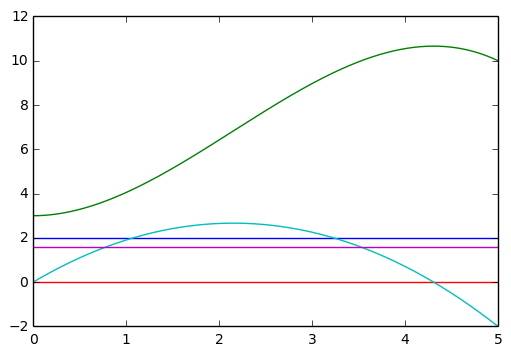

In [198]:
t_ = np.zeros((1,500))
x_ = np.zeros((5,501))

#initial conditions
x_[:,0] = x_0[:,0]

for i in range(0,500):
    t_[:,i] = ts*i
    x_[:,i+1] = np.dot(Ad,x_[:,i])+np.squeeze(np.dot(Bd,u[2*i:2*i+2,:]))

t_ = np.hstack((np.squeeze(t_), np.array([500*ts])))

plt.plot(t_, x_[0,:], label='traj_1')
plt.plot(t_, x_[1,:], label='traj_2')
plt.plot(t_, x_[2,:], label='traj_3')
plt.plot(t_, x_[3,:], label='traj_4')
plt.plot(t_, x_[4,:], label='traj_5')

From this we see that the calculated input sequence resulted in the desired final output.

c. Assess observability of the asteroids control system  (i.e. construct the observability matrix and determine its rank).

Recall from previous homework we have that

$$C = D_xh(x_0,u_0) = \begin{bmatrix}
1&0&0&0&0\\
0&1&0&0&0\\
0&0&0&0&1\\
\end{bmatrix}, D = D_uh(x_0,u_0) = \begin{bmatrix}
0&0\\
0&0\\
0&0\\
\end{bmatrix}$$

We know that the observability matrix determined by $A,C$ is then given as

\begin{eqnarray}
{\mathcal{O}} &=& \begin{bmatrix}
C\\CA\\CA^2\\CA^3\\CA^4\\
\end{bmatrix}\\
&=&\begin{bmatrix}
1&0&0&0&0\\
0&1&0&0&0\\
0&0&0&0&1\\
0&0&1&0&0\\
0&0&0&1&0\\
0&0&0&0&0\\
0&0&-k&0&0\\
0&0&0&-k&0\\
0&0&0&0&0\\
0&0&k^2&0&0\\
0&0&0&k^2&0\\
0&0&0&0&0\\
0&0&-k^3&0&0\\
0&0&0&-k^3&0\\
0&0&0&0&0\\
\end{bmatrix}
\end{eqnarray}

Further, rank($\mathcal{O}$) = 5, and the system is thus observable.

d. Simulate the system from an initial condition to a final condition (different from the initial condition), and use the Singular Value Decomposition of the observability matrix to construct the initial condition using the simulation's output.

First let's create our observability matrix and then compute the SVD

In [227]:
c = np.array([[1, 0, 0, 0, 0,],[0,1,0,0,0],[0,0,0,0,1]])
# SVD

O= np.zeros((1500,5))

for i in range(0,500):
    O[i*3:i*3+3,:] = np.dot(c,np.linalg.matrix_power(Ad,499-i))

O_svd = np.linalg.svd(O)
OU = O_svd[0]
OS = np.diag(O_svd[1])
OV = np.transpose(O_svd[2])
zero_padder = np.zeros((1495,5))
OS = np.concatenate((OS, zero_padder), axis = 0)

#psuedo inverse
os = np.linalg.pinv(OS)


Now let's get some observations

In [228]:

t_ = np.zeros((1,500))
y_ = np.zeros((1500,1))

storage = np.zeros((3,1))

for i in range(0,500):
    for j in range (0,i+1):
        storage = storage+np.dot(np.dot(c, np.linalg.matrix_power(Ad,i-j)),np.dot(Bd,u[2*j:2*j+2,:]))
    t_[:,i] = ts*i
    cx = np.expand_dims(np.dot(c,x_[:,i]), axis=1)
    y_[3*i:3*i+3,:] = cx-storage
    storage = np.zeros((3,1))


And now compute our estimated initial state

In [229]:
print np.dot(np.dot(OV,os),np.dot(np.transpose(OU),y_))

[[  2.00000000e+00]
 [  2.99805174e+00]
 [ -1.99840144e-15]
 [ -5.66693287e-03]
 [  1.57079633e+00]]


Our computed/estimated initial state is very close to the actual initial state, as desired.

# Project control system

This problem deals with your project control system (N)
$$\dot{x} = f(x,u),\ y = h(x,u)$$
with equilibrium
$$ f(x_0,u_0) = 0$$
and associated linear control system (L)
$$\dot{\xi} = A\xi + B\mu,\ \eta = C\xi + D\mu$$
obtained with $A = D_x f(x_0,u_0)$, $B = D_u f(x_0,u_0)$, $C = D_x h(x_0,u_0)$, $D = D_u h(x_0,u_0)$.

a. Assess controllability of your control system (i.e. construct the controllability matrix and determine its rank).

b. Modify your control system as needed to ensure it is controllable.

c. Choose an initial condition and final condition (different from the initial condition), and use the Singular Value Decomposition of the controllability matrix to construct a control input that steers the initial condition to the final condition.

d. Assess observability of the asteroids control system  (i.e. construct the observability matrix and determine its rank).

e. Modify your control system as needed to ensure it is observable.

f. Simulate the system from an initial condition to a final condition (different from the initial condition), and use the Singular Value Decomposition of the observability matrix to construct the initial condition using the simulation's output.